## Prediction of online shoppers’purchasing intention

### Dataset description
* Among these features, *Administrative, Administrative Duration, Informational,Informational Duration, Product Related*, and *Product Related Duration* represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

* The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g., moving from one page to another. 

* The *Bounce Rate, Exit Rate*,  and *Page Value* features shown in Table represent the metrics measured by Google Analytics for each page in the e-commerce site. These values can be stored in the application database for all Web pages of the e-commerce site in the developed system and updated automatically at regular intervals.

* The value of Bounce Rate feature for a Web page refers to the percentage of visitors who enter the site from that page and then leave (bounce) without triggering any other requests to the analytics server during that session. 

* The value of Exit Rate feature for a specific Web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

* The Page Value feature represents the average value for a Web page that a user visited before completing an e-commerce transaction. 

* The Special Day feature indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction. 

* The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

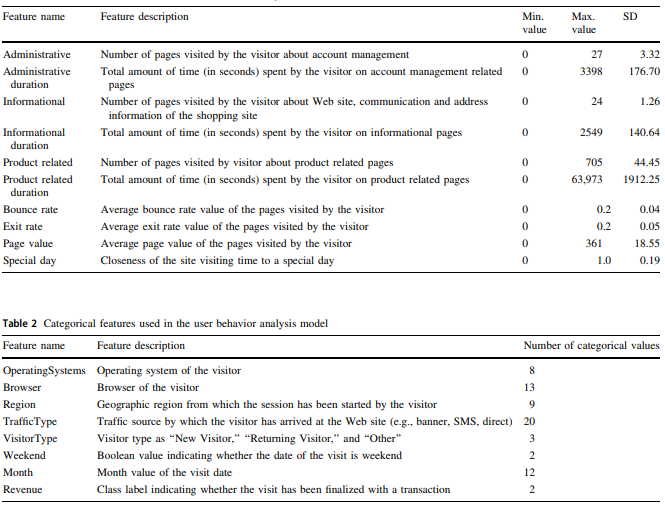

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_repo = '/content/drive/MyDrive/projects/online_shoppers_intention.csv'
raw_data = pd.read_csv(data_repo)
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
print(raw_data['Revenue'].value_counts())
print(raw_data['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64
False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [ ]:
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
                  ]
category_cols = ['Month', 'OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'] 

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

<Figure size 864x864 with 0 Axes>

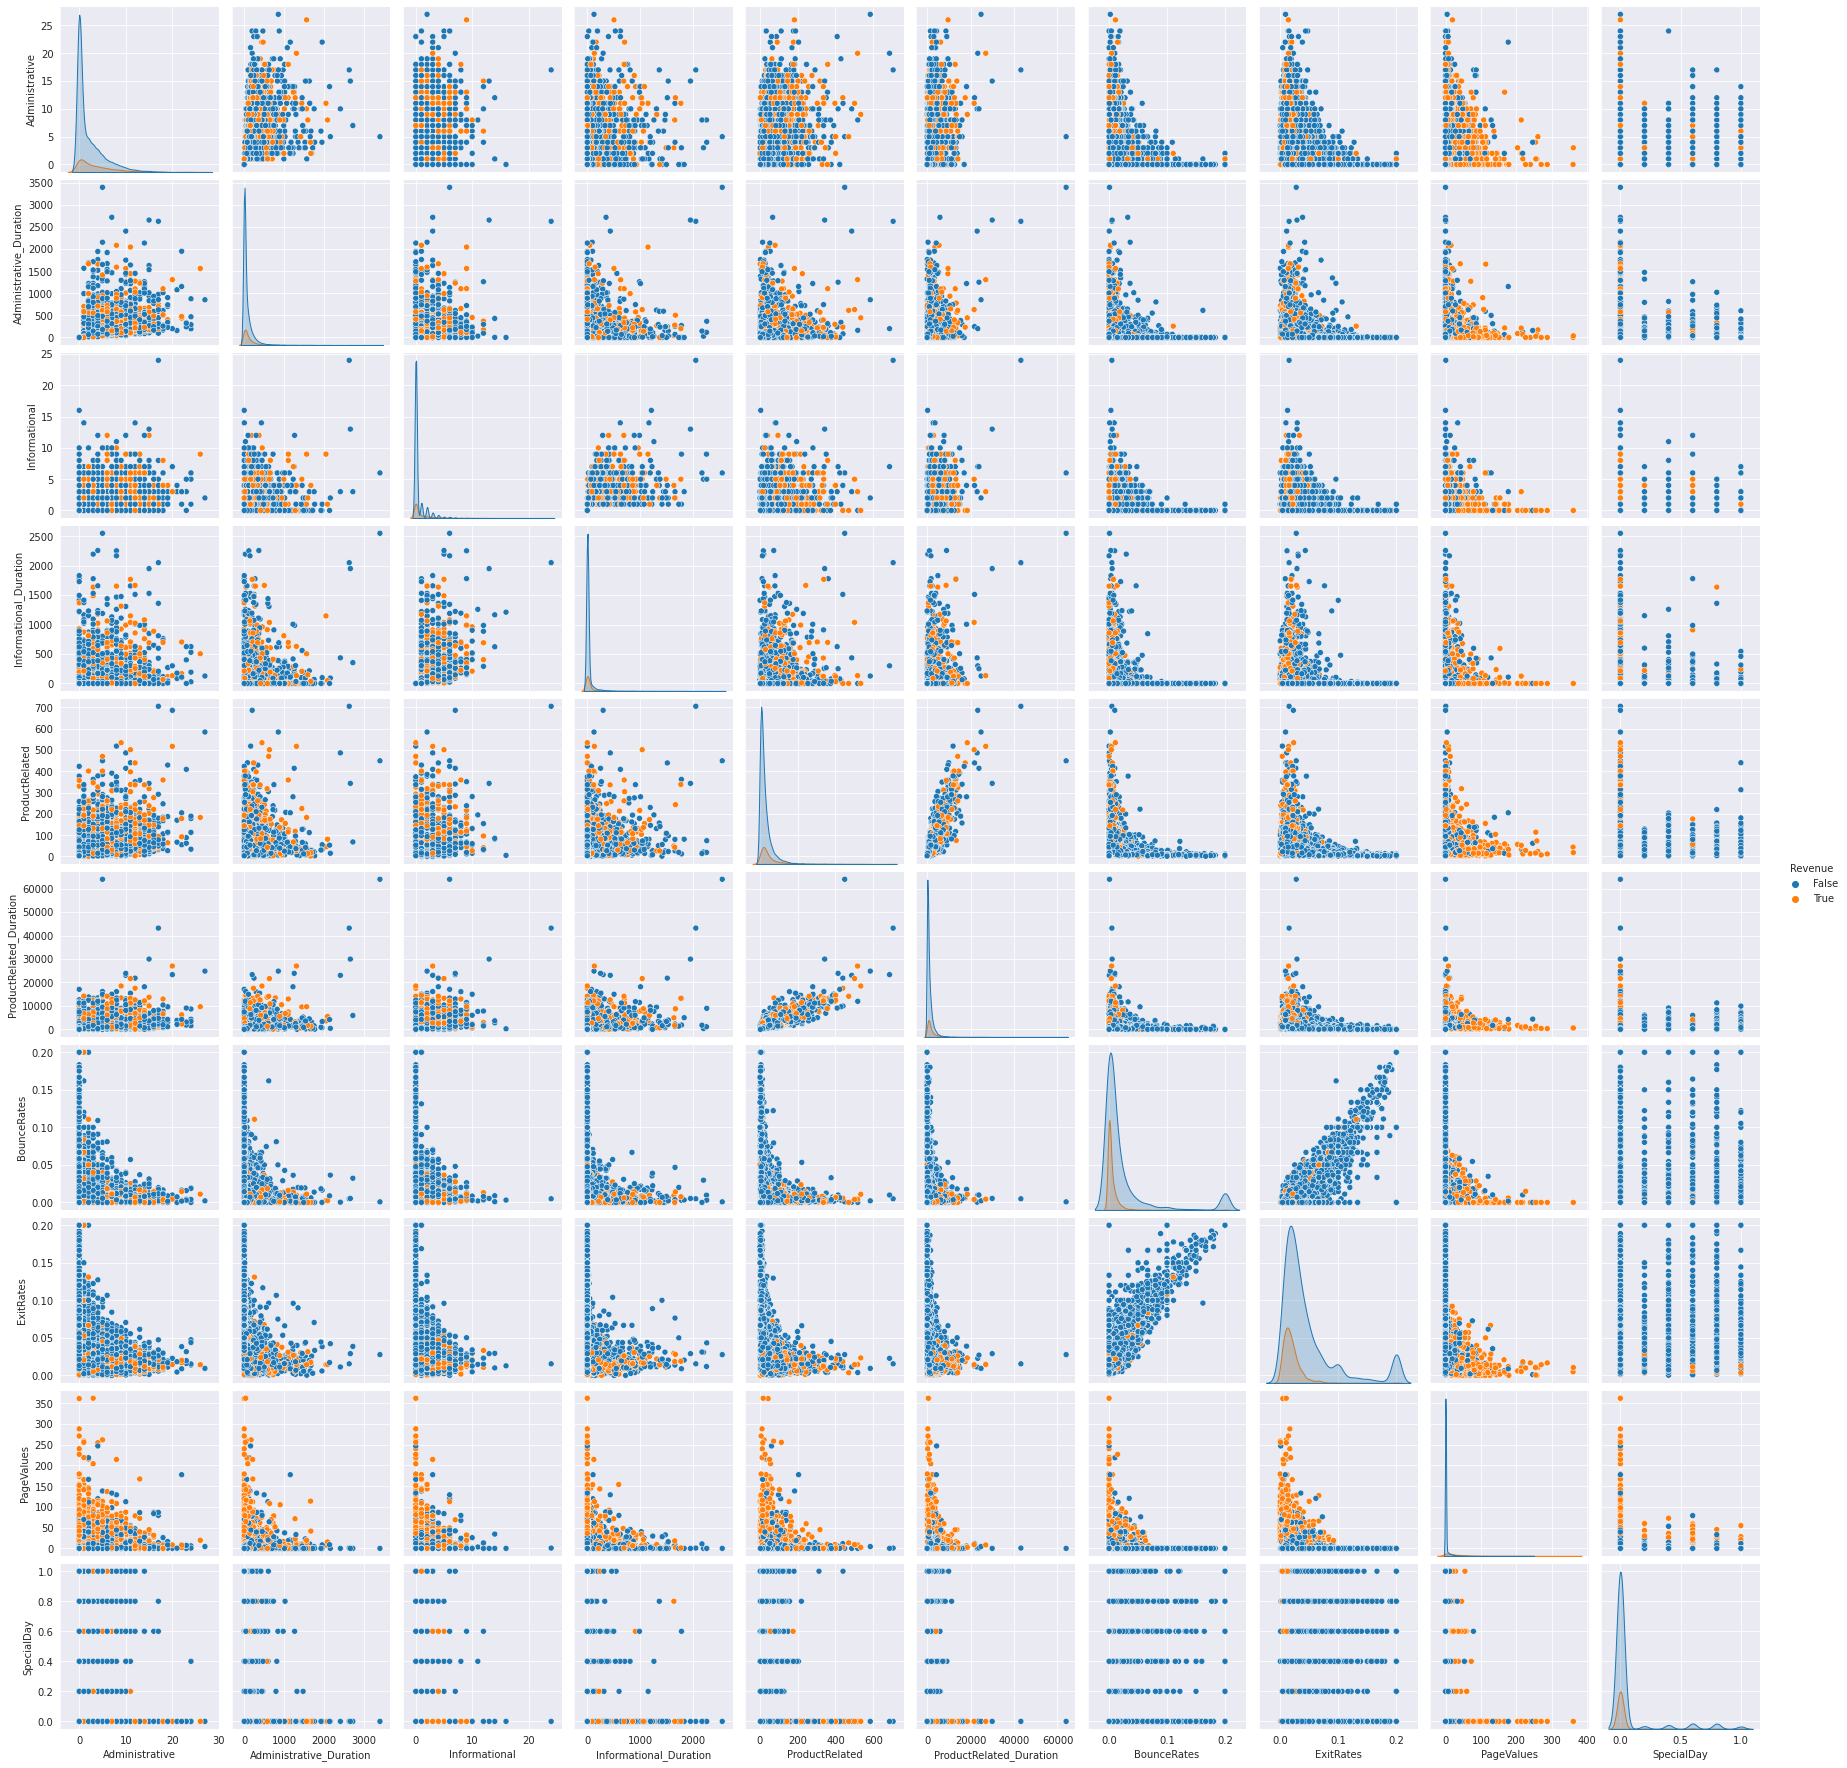

In [ ]:
plt.figure(figsize=(12,12))
numerical_feature = raw_data.loc[:,numerical_cols+['Revenue']]
sns.pairplot(numerical_feature, hue="Revenue")
plt.show()

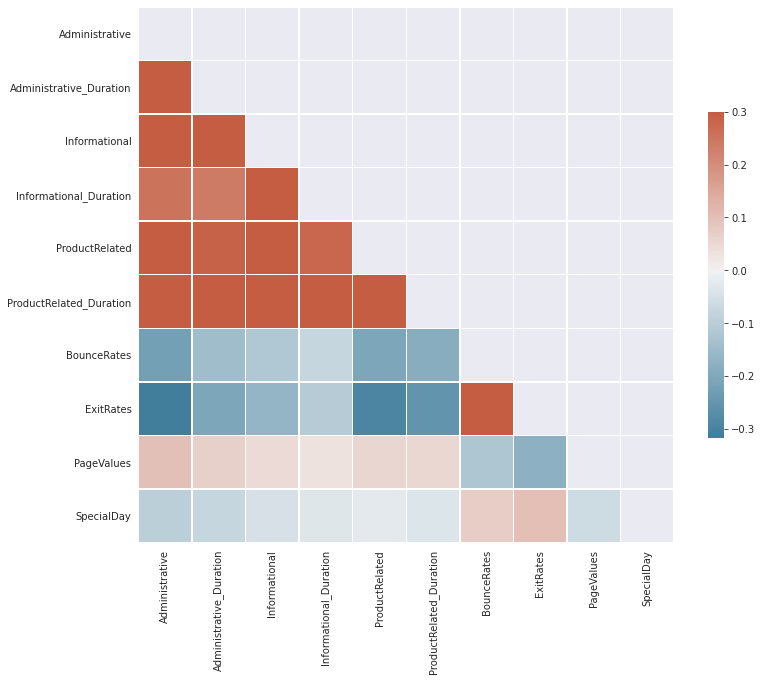

In [ ]:
corr = raw_data[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

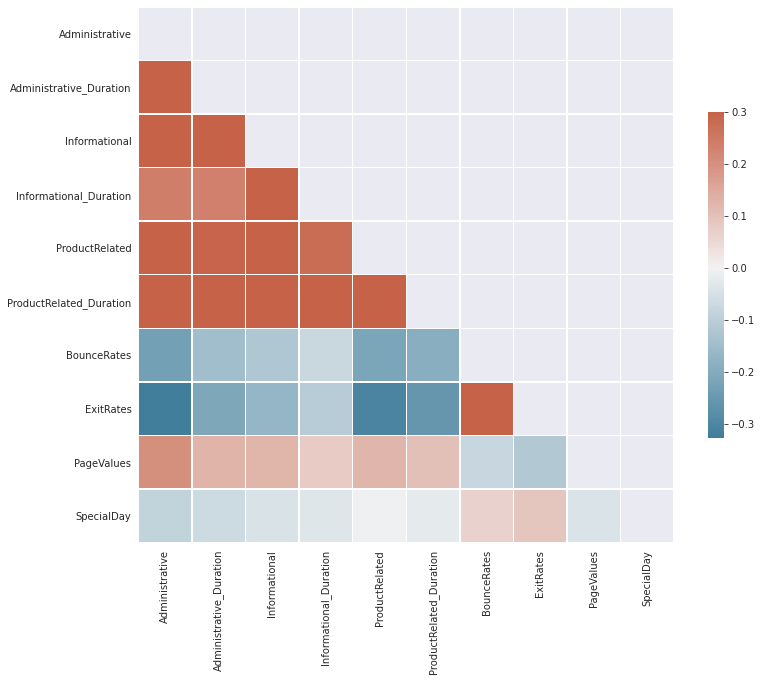

In [ ]:
corr1 = raw_data.loc[raw_data["Revenue"]==False,numerical_cols].corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

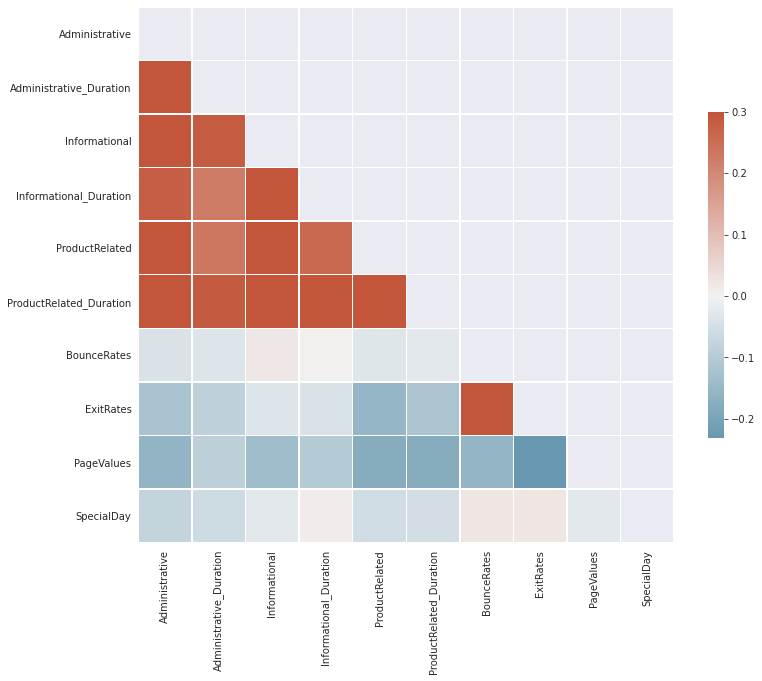

In [ ]:
corr2 = raw_data.loc[raw_data["Revenue"]==True,numerical_cols].corr()
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Add Averge duration by pages' tpye

In [ ]:
raw_data['Administrative_avg_dur'] = raw_data['Administrative_Duration'] / (raw_data['Administrative'] + 1e-10)
raw_data['Informational_avg_dur'] = raw_data['Informational_Duration'] / (raw_data['Informational'] + 1e-10)
raw_data['ProductRelated_avg_dur'] = raw_data['ProductRelated_Duration'] / (raw_data['ProductRelated'] + 1e-10)

<Figure size 864x864 with 0 Axes>

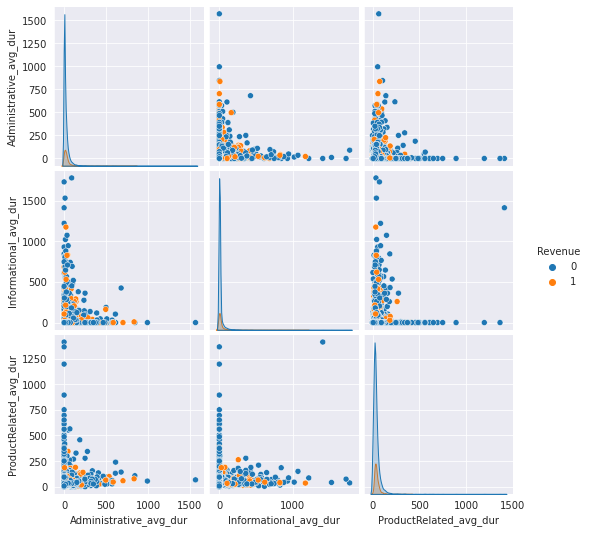

In [ ]:
plt.figure(figsize=(12,12))
add_features = raw_data.loc[:,['Administrative_avg_dur','Informational_avg_dur','ProductRelated_avg_dur','Revenue']]
sns.pairplot(add_features, hue="Revenue")
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
numerical_cols = numerical_cols+['Administrative_avg_dur','Informational_avg_dur','ProductRelated_avg_dur']
raw_data[numerical_cols+['Revenue']].groupby(['Revenue']).mean().T

Revenue,0,1
Administrative,2.117732,3.393606
Administrative_Duration,73.740111,119.483244
Informational,0.451833,0.786164
Informational_Duration,30.236237,57.611427
ProductRelated,28.714642,48.210168
ProductRelated_Duration,1069.987809,1876.209615
BounceRates,0.025317,0.005117
ExitRates,0.047378,0.019555
PageValues,1.975998,27.264518
SpecialDay,0.068432,0.023166


In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
for cols in category_cols:
    print('====================column name : ', cols, '====================')
    print(raw_data[cols].value_counts())
    print(raw_data.loc[raw_data['Revenue']==0,cols].value_counts())
    print(raw_data.loc[raw_data['Revenue']==1,cols].value_counts())
    print('==============================================================|')

====================column name :  Month ====================
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
May     2999
Nov     2238
Mar     1715
Dec     1511
Oct      434
Jul      366
Sep      362
Aug      357
June     259
Feb      181
Name: Month, dtype: int64
Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64
==============================================================|
====================column name :  OperatingSystems ====================
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
2    5446
3    2287
1    2206
4     393
8      62
6      17
7       6
5       5
Name: OperatingSystems, dtype: int64
2    1155
1     379
3     268
4      85
8      17
6       2
7       1
5       1
Name: OperatingSystems, dtype

In [ ]:
# change month -> season
# [3,4,5], [6,7,8], [9,10,11], [12,1,2] 

In [ ]:
raw_data['Revenue'] = np.where(raw_data['Revenue']==True, 1, 0)

In [ ]:
raw_data[numerical_cols] = raw_data[numerical_cols].astype(float)
raw_data[category_cols] = raw_data[category_cols].astype('category')

## Baseline model & evaluation startegy
* 기존 feature 그대로 활용
* Under Area of Precision-recall Curve + Stratified cross-validation
* Sampling & Prediction
* Logistic-regression, SVM, RandomForest, GradientBoosting

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def get_datapoint(df):
    X = df.loc[:, numerical_cols+category_cols]
    y = df.loc[:, 'Revenue']
    return X, y

# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
    p, r, _ = precision_recall_curve(y_true, probas_pred)
    return auc(r, p)

# def evaluate_model(X, y, model):
#     # define evaluation procedure
#     cv = StratifiedKFold(n_splits=5)
#     # define the model evaluation the metric
#     metric = make_scorer(pr_auc, needs_proba=True)
#     # evaluate model
#     scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
#     return scores

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

In [ ]:
def get_models():
    models, names = list(), list()

    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, category_cols)])

    logistic_steps = [('feature_extraction', preprocessor), ('classifier', LogisticRegression())]
    models.append(Pipeline(steps=logistic_steps))
    names.append('LR')

    svm_steps = [('feature_extraction', preprocessor), ('classifier', SVC(probability=True))]
    models.append(Pipeline(steps=svm_steps))
    names.append('SVM')

    rf_steps = [('label_encoding', preprocessor), ('classifier' , RandomForestClassifier(n_estimators=500))]
    models.append(Pipeline(steps=rf_steps))
    names.append('RF')

    gb_steps = [('label_encoding', preprocessor), ('classifier' , GradientBoostingClassifier(n_estimators=500))]
    models.append(Pipeline(steps=gb_steps))
    names.append('GB')

    return models, names

In [ ]:
# define models
import time
models, names = get_models()
results = list()

In [ ]:
# evaluate each model
X, y = get_datapoint(raw_data)
for i in range(len(models)):
    initial_time = time.time()
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
    print('{} sec spent for cross validation'.format(time.time()-initial_time))
    print()

>LR 0.511 (0.011)
2.3504433631896973 sec spent for cross validation

>SVM 0.575 (0.055)
73.04722332954407 sec spent for cross validation

>RF 0.613 (0.036)
98.4589626789093 sec spent for cross validation

>GB 0.631 (0.049)
44.32398295402527 sec spent for cross validation



## Sampling Strategy for imbalanced data
* Dimension reduction -> Visualization
* Oversampling Technique (SMOTE) -> Visualization -> Modeling

## GridSearch for hyperparameters